<a href="https://colab.research.google.com/github/divyajmk/assignment3/blob/main/Final_assignment_knn_and_kmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/knn`

In [3]:
! git clone https://www.github.com/DS3001/knn

Cloning into 'knn'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 16 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (16/16), 7.28 MiB | 9.17 MiB/s, done.
Resolving deltas: 100% (2/2), done.


**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [15]:
# Answers for Question 1

import pandas as pd
from sklearn.neighbors import KNeighborsRegressor as kNNRegression # Import the kNN regression tool
# ------------- PART 1 -------------
data = pd.read_csv("./knn/data/car_data.csv")
print(data.head(), '\n')
print(data.columns, '\n')

# ------------- PART 2 -------------
# Summarize the variables defined - they are the columns of the dataset
print(data.describe(), '\n')

# Look for missing values
missing_vals = data.isnull().sum()
print("Missing vals: \n ", missing_vals, '\n' )

print(data['Gender'].value_counts(), '\n')

# Convert the Gender cateogrical variable into a dummy variable
# Make a missing dummy equal 0 for male and 1 for female
data['gender_dummy'] = 0
data.loc[ data['Gender']== 'Female', 'gender_dummy'] = 1
data['gender_dummy'].value_counts()

# Create a matrix  𝑋  of predictors including Age and AnnualSalary,
# and an outcome  𝑦  equaling Purchase.
X = data.loc[:,['Age','AnnualSalary']]
y = data['Purchased']




   User ID Gender  Age  AnnualSalary  Purchased
0      385   Male   35         20000          0
1      681   Male   40         43500          0
2      353   Male   49         74000          0
3      895   Male   40        107500          1
4      661   Male   25         79000          0 

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object') 

           User ID          Age   AnnualSalary    Purchased
count  1000.000000  1000.000000    1000.000000  1000.000000
mean    500.500000    40.106000   72689.000000     0.402000
std     288.819436    10.707073   34488.341867     0.490547
min       1.000000    18.000000   15000.000000     0.000000
25%     250.750000    32.000000   46375.000000     0.000000
50%     500.500000    40.000000   72000.000000     0.000000
75%     750.250000    48.000000   90000.000000     1.000000
max    1000.000000    63.000000  152500.000000     1.000000 

Missing vals: 
  User ID         0
Gender          0
Age             0
AnnualSalary  

In [10]:
# ------------- PART 3 -------------
# MaxMin-normalize Age and AnnualSalary in X

# Maxmin normalization function:
def maxmin(x):
    x = (x - min(x)) / (max(x) - min(x))
    return x
X = X.apply(maxmin)
X.describe()


# ------------- PART 4 -------------
# Split the sample into an ~80% training dataset and a ~20% testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# ------------- PART 5 -------------
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Determine the optimal k:
k_bar = 30
k_grid = np.arange(1,k_bar)
SSE_vals = np.zeros(k_bar)
for k in range(k_bar):
  knn = KNeighborsClassifier(n_neighbors=k+1)
  model = knn.fit(X_train,y_train)
  y_hat = model.predict(X_test)
  SSE_vals[k] = np.sum( (y_test-y_hat)**2 )

# Determine the optimal  𝑘  for these data.
optimal_k = k_grid[np.argmin(SSE_vals)]
print(f"Optimal k: {optimal_k}")


# ------------- PART 6 -------------
# Run the model for optimal number of neighbors on the testing data.

# Create and fit the knn model
knn = KNeighborsClassifier(n_neighbors=8)
model = knn.fit(X_train, y_train)

# Predict values for the test set
y_pred = model.predict(X_test)

# Cross tabulate the predicted outcomes against the actual outcomes
# = Confusion Matrix
pd.crosstab(y_test, y_pred)

Optimal k: 8


col_0,0,1
Purchased,,
0,106,13
1,4,77


In [5]:
# ------------- PART 7 -------------
# Compute confusion matrices for men and women
X = data.loc[:,['Age', 'AnnualSalary', 'Gender']]
y = data['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Train the model using the selected k (without gender variable)
knn = KNeighborsClassifier(n_neighbors=8)
model = knn.fit(X_train.drop('Gender',axis=1),y_train)
y_hat = model.predict(X_test.drop('Gender',axis=1))

# Find true/predicted values by recorded gender:
y_hat_M = y_hat[ X_test['Gender'] == 'Male']
y_hat_F = y_hat[ X_test['Gender'] == 'Female']
y_M = y_test[ X_test['Gender'] == 'Male']
y_F = y_test[ X_test['Gender'] == 'Female']

pd.crosstab(y_F, y_hat_F)

col_0,0,1
Purchased,,
0,61,6
1,6,32


In [8]:
pd.crosstab(y_M, y_hat_M)

col_0,0,1
Purchased,,
0,48,4
1,18,25


Part 2:

There are no missing values in the variables (User.ID, Gender, Age, AnnualSalary, Purchase).

Part 5:

The optimal *k* value was found by finding the *k* value with the smallest SSE. In this question, the optimal *k* value was roughly 8 to 9, with the optimal *k* value chosen as 8.

Part 6:

The vast majority of cases are predicted correctly since the majority of the 0's go to 0s and 1's go to 1s. There are 13 times where a 0 was classifed as a 1, and 4 times where a 1 was classified as a 0, but this inaccuracy was 17/200 = 0.085 proportion of cases. The overall accuracy is 183/200, which is 0.92 proportion of cases. Thus, it can be said that the model provides accurate predictions since the accuracy rate is roughly 0.92.

Part 7:

For men, there were 4 times where a 0 was classifed as a 1 and 18 times were a 1 was classifed as a 0. The overall accuracy was about 73/95 = 0.7684. On the other hand, for women, there were 6 times where a 0 was classifed as a 1 and 6 times where a 1 was classifed as a 0. The overall accuracy was about 93/105 = 0.8857. It seems like the model does a better job at predicting what a female customer will do, rather than a male customer. Although the model is overall more accurate for female customers, the accuracy rate is still not over 0.90. Some may consider an accuracy rate of over 0.90 to be a good indicator of accuracy in some scenarios. In this situtaion, the model was predicting when a sale occurs or fails to occur. However, for situations more severe (such as finding who needs treatment, who needs medical attention, or is wrongly held in jail, etc.) would require different ways to think on how to improve accuracy and fairness for those impacted. This is so the model can better predict for women and men and have a better accuracy rate.  


**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.

2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

Missing Values: 
 price      0
year       0
mileage    0
dtype: int64
(2499, 3) 

price      int64
year       int64
mileage    int64
dtype: object 

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654 



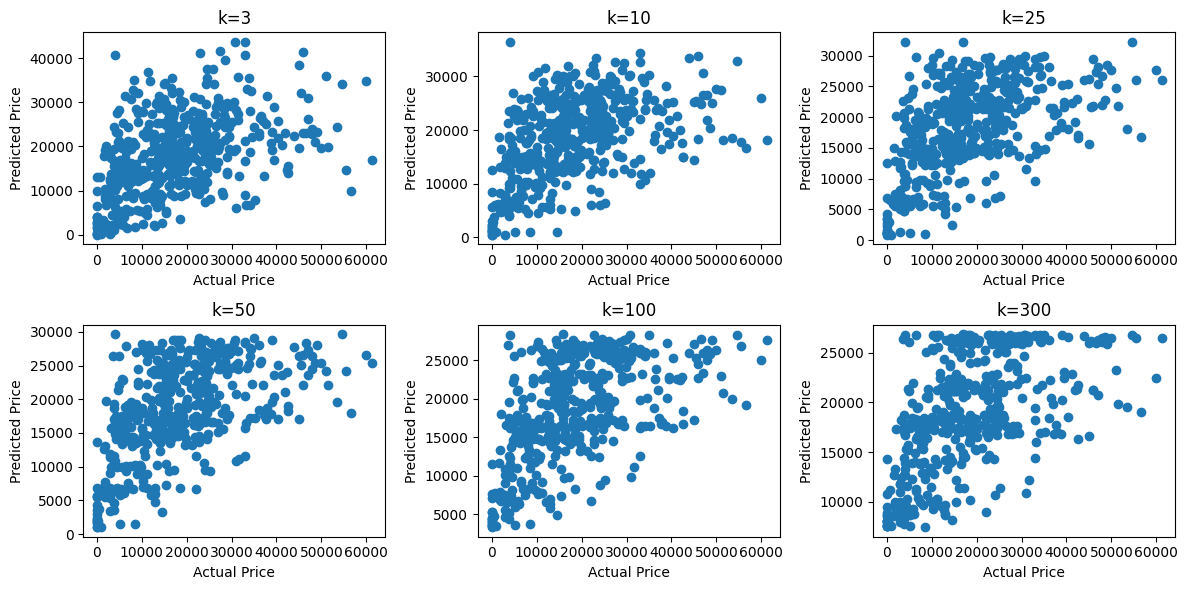

k=3, SSE=126446573.21822222 

k=10, SSE=110802185.58681999 

k=25, SSE=103170457.848608 

k=50, SSE=99695443.96419598 

k=100, SSE=98271058.96092059 

k=300, SSE=100477298.914212 

Optimal k: 100


In [60]:

# Answers for Question 2

import pandas as pd
# ------------- PART 1 -------------
# Load the Data
data = pd.read_csv("./knn/data/USA_cars_datasets.csv")

# Keep the required variables
data = data[['price', 'year', 'mileage']]

# Look for NA's
missing_vals = data.isna().sum()
print("Missing Values: \n", missing_vals)

# Look at the head and dimensions of the data
print(data.shape, '\n')
print(data.dtypes, '\n')
print(data.head(), '\n')

# ------------- PART 2 -------------
# Import the kNN regression tool
from sklearn.neighbors import KNeighborsRegressor as kNNRegression

# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

# Apply maxmin to year
data['year'] = maxmin(data['year'])

# Apply maxmin to mileage
data['mileage'] = maxmin(data['mileage'])

# Split the sample into ~80% for training and ~20% for evaluation
# Price is what we are trying to predict
X = data[['year', 'mileage']]
y = data['price']

# ------------- PART 3 -------------
# Import
from sklearn.model_selection import train_test_split
# The random state was 100 as in the lecture example
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=100)

# ------------- PART 4 -------------
# Use the for regression and the training data to predict price using year and mileage
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

k_vals = [3,10,25,50,100,300]
# Array to store the sum of squared error values for each k
SSE_vals = []
predicted_vals = []

# Iterate through each k value and find SSE
for k in k_vals:
  # Create and fit the KNN model
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train, y_train)

  # Predict on evaluation set (price)
  y_pred = knn.predict(X_eval)

  # Calculate SSE
  SSE = mean_squared_error(y_eval, y_pred)
  SSE_vals.append(SSE)

  # Store the predicted values for the scatterplot
  # We are plotting predicted values, not SSE
  predicted_vals.append(y_pred)

#   This scatterplot shows the SSE for every k together
#   plt.scatter(y_eval, y_pred, label=f'k={k}')

# # Show the sactterplot for the SSE for every k together
# plt.xlabel("Actual Price")
# plt.ylabel("Predicted Price")
# plt.legend()
# plt.show()

# Create a scatterplot for each k
plt.figure(figsize=(12, 6))
for i, k in enumerate(k_vals):
    # Create scatterplots in a 2x3 arrangment
    plt.subplot(2, 3, i + 1)
    plt.scatter(y_eval, predicted_vals[i])
    plt.title(f'k={k}')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")

# Show the scatterplots
plt.tight_layout()
plt.show()

# Print SSE for each k
for k, sse in zip(k_vals, SSE_vals):
  print(f'k={k}, SSE={sse}', '\n')

# ------------- PART 5 -------------
# Determine the optimal  𝑘  for these data.
optimal_k = k_vals[SSE_vals.index(min(SSE_vals))]
print(f"Optimal k: {optimal_k}")



Part 1.

There does not seem to be any missing values for 'price', 'year', and 'mileage' in the dataset.

Part 4.

I noticed patterns in how the model would react to outliers and how the SSE values changed as *k* increased.
For small k values (e.g., *k*=3), I observed that the model seemed to overfit the data, meaning it would capture too much noise in the data, resulting in a model that was sensitive to outliers and fluctuations. For large k values (e.g., *k*=300), I noticed that the model's predictions became less sensitive to individual data points, which may result in the model not capturing the underlying patterns in the data.  
I observed that the Sum of Squared Error decreased as *k* increased until a certain point, *k* = 100, and then started to increase again.
In the scatterplot, I also noticed that for small *k* values, the predicted values were closer to the training data points. However, the model did not generalize well to new data (overfitting), such as outliers. For larger *k* values, the model became more generalized and the predicted values were further apart from the training data points.



Part 5:

The optimal k corresponds to the point where the error is minimized.The choice of the optimal *k* was determined by finding the *k* with the minimized SSE, and this was found to be *k* = 100.

Part 6:

With a small *k*, like 3, the predictions may be close to the actual values, but the model can be sensitive to noise and outliers in the data. Thus, resulting in predictions that are highly sensitive to individual data points.  As *k* is increased to values like 10 or 25, the scatterplots exhibit more stability, and predictions become smoother. Further increasing *k*, for instance, to 50, 100, or 300, results in even smoother scatterplots and predictions. The model becomes less sensitive to outliers and noise in the data, reducing the risk of overfitting. However, it also becomes less capable of capturing the underlying complexities and patterns within the dataset. As *k* increased, the SSE decreased and then increased again after *k* = 100. A lower SSE is  generally better, as it may imply that the model is making more accurate predictions, but very large values of *k* might lead to underfitting.

In summary, increasing *k* tends to make predictions more stable and less sensitive to noise and outliers. This is because the model considers a larger number of "neighbors" when making predictions. However, there is a trade-off between underfitting (large *k*) and overfitting (small *k*).
  - With small *k* values, the model can overfit the training data, resulting in high variance and low bias. There is high variance because the model is sensitive to outliers, but low bias because the model fits the training data very closely.
  - With very large *k* values, the model may underfit the data, leading to high bias and low variance. There is high bias because the model doesn't fit the training data well, and its predictions are not accurate. As seen in the scatterplot for *k* = 300, the prediction data were further apart from the training data than in the scatterplot for *k* = 3. Thus, the model's predictions are not well aligned with the training data. Additionally, there is low variance because the model is less sensitive to outliers.
  - Larger *k* values result in a reduction of model variance as the predictions are less likely to be influenced by noise or outliers in the training data. Larger *k* values also result in the model to introduce more bias since the model could miss out on fine-grained patterns in the data when generalizing to the overall data distriubtion.

**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [18]:
# Answers for Question 6

# ------------- PART 1 -------------
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans # Import kmc
import matplotlib.pyplot as plt

def createData(noise,N=50):
  np.random.seed(100) # Set the seed for replicability

  # Generate (x1,x2,g) triples:
  X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
  X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
  X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])

  # Concatenate into one data frame
  gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
  gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
  gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
  df = pd.concat([gdf1,gdf2,gdf3],axis=0)
  return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

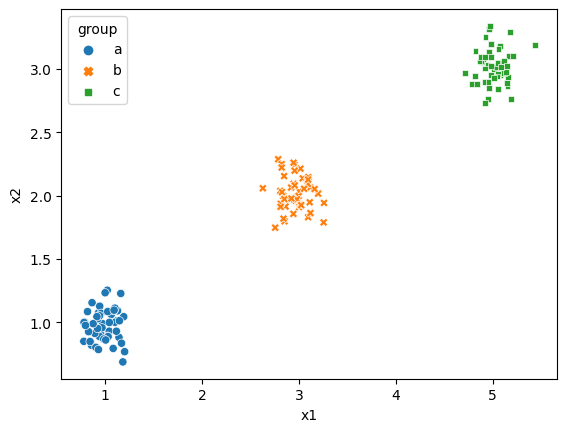

In [20]:
# ------------- PART 2 -------------
# Make scatterplots of the (X1, X2) points by group for each of the datasets
# Think of X1 as x and X2 as y and Noise goes to 0.125 to 2.0
sns.scatterplot(data = df0_125, x= 'x1', y= 'x2', hue='group', style='group' )


<Axes: xlabel='x1', ylabel='x2'>

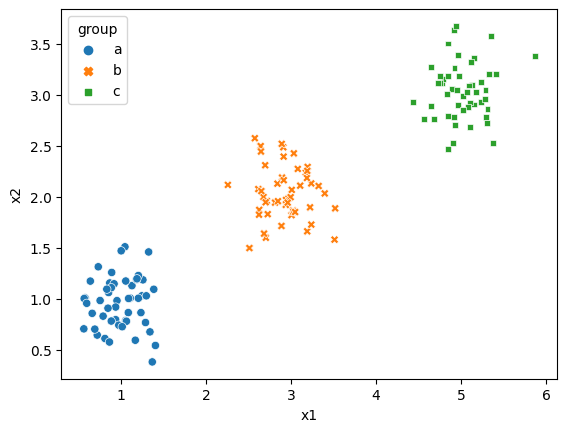

In [21]:
# ------------- PART 2 -------------
# Make scatterplots of the (X1, X2) points by group for each of the datasets
# Think of X1 as x and X2 as y and Noise goes to 0.125 to 2.0
sns.scatterplot(data = df0_25, x= 'x1', y= 'x2', hue='group', style='group' )


<Axes: xlabel='x1', ylabel='x2'>

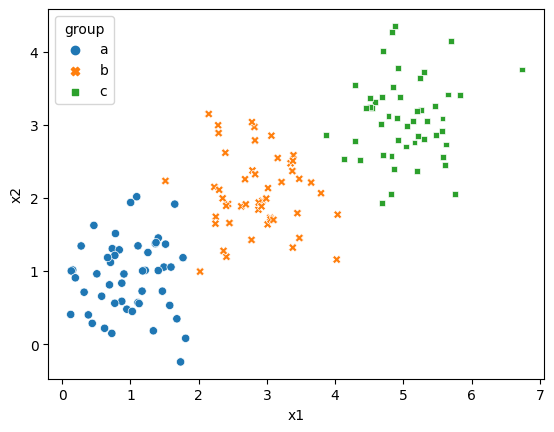

In [22]:
# ------------- PART 2 -------------
# Make scatterplots of the (X1, X2) points by group for each of the datasets
# Think of X1 as x and X2 as y and Noise goes to 0.125 to 2.0
sns.scatterplot(data = df0_5, x= 'x1', y= 'x2', hue='group', style='group' )


<Axes: xlabel='x1', ylabel='x2'>

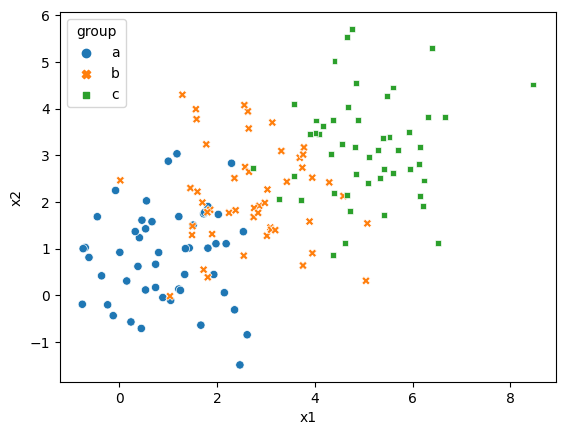

In [24]:
# ------------- PART 2 -------------
# Make scatterplots of the (X1, X2) points by group for each of the datasets
# Think of X1 as x and X2 as y and Noise goes to 0.125 to 2.0
sns.scatterplot(data = df1_0, x= 'x1', y= 'x2', hue='group', style='group' )


<Axes: xlabel='x1', ylabel='x2'>

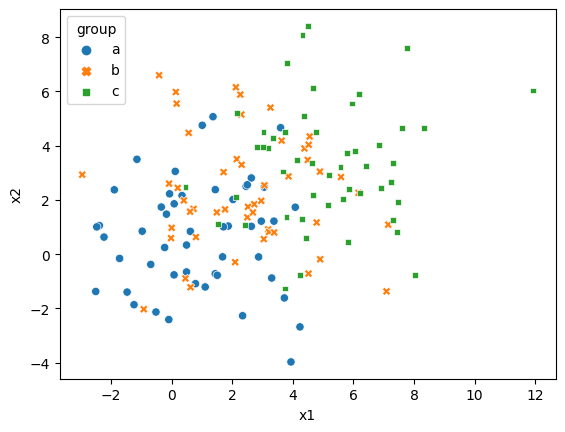

In [25]:
# ------------- PART 2 -------------
# Make scatterplots of the (X1, X2) points by group for each of the datasets
# Think of X1 as x and X2 as y and Noise goes to 0.125 to 2.0
sns.scatterplot(data = df2_0, x= 'x1', y= 'x2', hue='group', style='group' )


In [37]:
# ------------- PART 3 -------------

# Maxmin function to normalize
def maxmin(x):
  x = (x-min(x))/(max(x)-min(x))
  return x

# Helper function to build scree plots for each of the datasets
def scree(data):

  # Normalize data after selecting data to cluster
  X = data.loc[ : , ['x1','x2'] ]
  X = X.apply(maxmin)

  # Create a scree plot:
  k_bar = 15
  k_grid = np.arange(1,k_bar+1)
  SSE = np.zeros(k_bar)
  for k in range(k_bar):
    # Create and fit the model
    kmc = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    kmc = kmc.fit(X)
    # Store SSE values
    SSE[k] = kmc.inertia_

  scree_plot, axes = plt.subplots()
  sns.lineplot(x=k_grid, y=SSE).set_title("Scree Plot")
  axes.set_ylim(0,35)

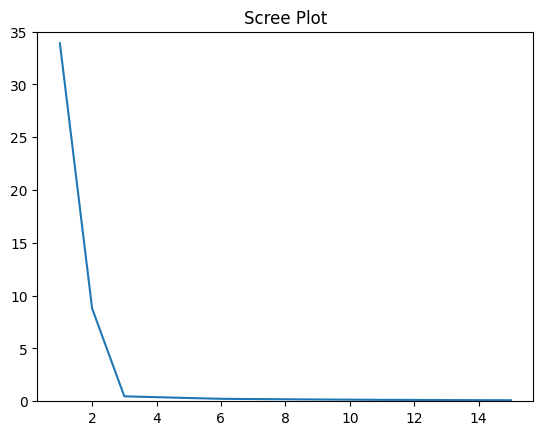

In [39]:
# ------------- PART 3 -------------
scree( data = df0_125 )

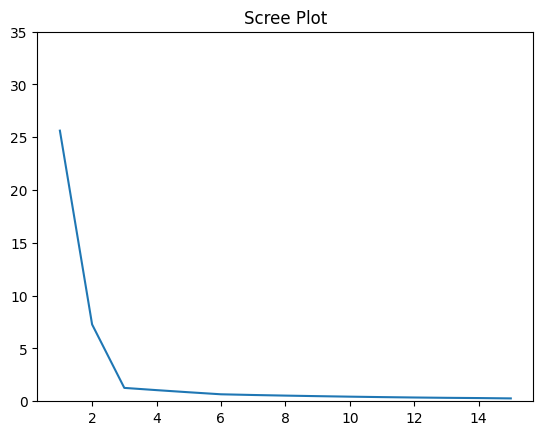

In [40]:
# ------------- PART 3 -------------
scree( data = df0_25)

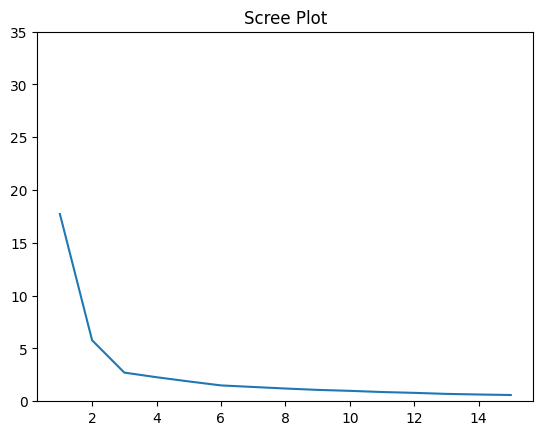

In [41]:
# ------------- PART 3 -------------
scree( data = df0_5 )

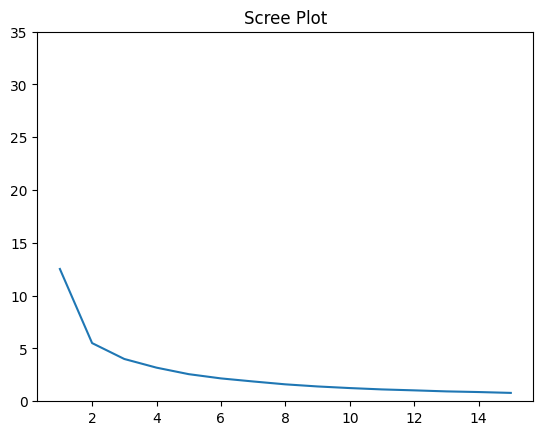

In [42]:
# ------------- PART 3 -------------
scree( data = df1_0 )

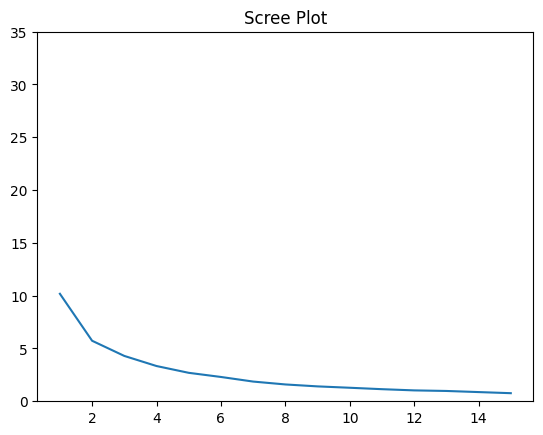

In [43]:
# ------------- PART 3 -------------
scree( data = df2_0 )

Part 2:

As the noise goes up (i.e., from 0.125 to 2), it was observed in the scatterplots that the clusters spread out and collided with data points from the other clusters. In the first scatterplot for noise = 0.125, the points for each cluster was closely grouped to the points in its respective cluster. In the final scatterplot for noise = 2, the points spread out to where points from one cluster started to collide with other points from other clusters. Thus, it was not possible to guess which cluster a given data point belongs to. At noise = 0.5 and greater, it looked like the pattern of clusters started to not hold and the points started to spread out.

Part 3:

For the level of noise = 0.125, noise = 0.25, noise = 0.5, the scree plots showed a distinct elbow at k = 3. However, for noise = 1, the elbow was not as distinct, but it could be said that there was an elbow at k = 2. Lastly, for noise = 2, the presence of an elbow was not obvious. Thus, it was hard to estimate where the elbow was, if there was any to be found. Therefore, it can be said that as the level of noise increases, it becomes difficult to clearly identify an elbow in the scree plot. Noise in the data can introduce randomness and high variability, making it more difficult to identify a clear elbow point and select an optimal *k* value.

Part 4:

The point where the reduction in SSE from *k* - 1 to *k* drops significantly compared from *k* to *k* + 1 is referred to as the elbow point, and generally the optimal *k*
value. If the clusters are distinctly separated, the marginal benefit of an additional cluster is large since a large drop in SSE can be captured. With distinctly separated clusters, it is also more clear on where the elbow is visually. On the other hand, as mentioned above in part 3, increasing the level of noise causes the points to spread out to where points collide with other points in other clusters. Thus, making it difficult to identify a clear elbow point as the clusters are visually indistinct. A large overlap of points among the different clusters makes it unclear how many clusters to pick or which points belong to which clusters. An example of this was seen for the scatterplot of noise level = 2. In summary, if the clusters are visually separated and distinct, then an elbow can be observed from the scree plot. However, if there is a high level of noise and the points are just in one big group with no distinct separation, then the elbow will be indistinct in the scree plot.

**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?